# Exercise 1 Implementation

Training

In [1]:
# Imports
import numpy as np
import matplotlib.pyplot as plt
import time
from memory_profiler import memory_usage

[[172 179 153 ...  28  32  44]
 [132 139 140 ...  45  38  44]
 [134 133 134 ... 228 226  36]
 ...
 [ 74  68  64 ...  47  48  19]
 [118 117 115 ...  50  50  15]
 [128 129 133 ...  17  14  16]] (416, 2577)
[[ 68  82  57 ... 213 185   4]
 [111 110 117 ...  25  25  14]
 [130 132 131 ...  62  65  38]
 ...
 [117 121 137 ... 128 128  17]
 [122 109 119 ...  60  61  35]
 [104 104 105 ... 111 109  23]] (104, 2577)


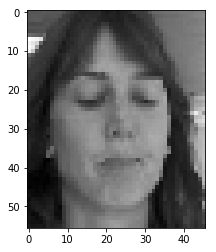

In [2]:
# Load the training and testing sets: 80% is training, 20% is testing

splittype = 'whole'

if (splittype == 'whole'):
    training = np.loadtxt('split_whole_train.gzip', dtype = 'uint8')
    test = np.loadtxt('split_whole_test.gzip', dtype = 'uint8')
elif (splittype == 'class'):
    training = np.loadtxt('split_class_train.gzip', dtype = 'uint8')
    test = np.loadtxt('split_class_test.gzip', dtype = 'uint8')
    
print (training, training.shape)
print (test, test.shape)

plt.imshow(np.reshape(training[100, :2576], (46,56)).T, cmap = 'gist_gray') 
# Print 100th image of the training set as a sanity check to make sure we have shuffled along the right dimension of the array

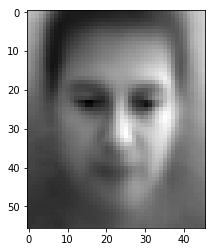

In [3]:
# Now let's start training our image recognition PCA algorithm
# We have face images that are CENTERED and they are of the SAME SIZE (needed for PCA)
# They are normalised for SCALE, ORIENTATION and TRANSLATION

# First, we only need the training and testing set without the labels
# Images are represented as rows
pca_train = training [:, :2576]
pca_test = test [:, :2576]

# Let's compute the mean face image
avg_face = np.mean(pca_train, axis=0)
plt.imshow(np.reshape(avg_face, (46,56)).T, cmap = 'gist_gray')

[[2760.26113512 2647.77910619 2400.84481902 ... -453.14017428
  -511.70410156 -527.89369915]
 [2647.77910619 2834.85215768 2638.40635979 ... -475.14528245
  -557.1778095  -576.06774686]
 [2400.84481902 2638.40635979 2715.89575051 ... -485.58338341
  -556.49541767 -572.12867511]
 ...
 [-453.14017428 -475.14528245 -485.58338341 ... 2781.7749399
  2649.00886418 2564.18449519]
 [-511.70410156 -557.1778095  -556.49541767 ... 2649.00886418
  2827.68051382 2768.19320913]
 [-527.89369915 -576.06774686 -572.12867511 ... 2564.18449519
  2768.19320913 2886.69258506]] (2576, 2576)


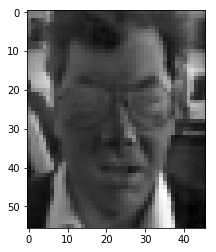

In [4]:
# Now let's subtract the mean face image from all of our training face images
pca_train_norm = pca_train-avg_face # works because of broadcasting
plt.imshow(np.reshape(pca_train_norm[0, :], (46,56)).T, cmap = 'gist_gray') 
# Show the first normalised face image and notice that it is distorted

# Computing the covariance matrix
cov = (np.dot(pca_train_norm.T, pca_train_norm))/416
print (cov, cov.shape)

In [5]:
# Computing the eigenvalues and eigenvectors of the covariance matrix directly and measuring how long it takes

start = time.time()
eigvals, eigvecs = np.linalg.eig(cov) # these are not ordered, so we need to order them according to the eigenvalues
end = time.time()
print (end-start) # Execution time in seconds

print (eigvals, eigvals.shape)
print (eigvecs, eigvecs.shape)
print (eigvals.min()) # Note that the smallest eigenvalue (most negative) is a zero eigenvalue (rounding error)

6.078167915344238
[ 9.49883240e+05+0.00000000e+00j  5.58084596e+05+0.00000000e+00j
  4.71115612e+05+0.00000000e+00j ... -2.68608884e-13-5.01701859e-14j
  1.62899547e-13+0.00000000e+00j -1.20352067e-13+0.00000000e+00j] (2576,)
[[-1.44173827e-02+0.00000000e+00j  1.02441457e-02+0.00000000e+00j
   1.73988440e-02+0.00000000e+00j ...  2.42313208e-03-6.22329464e-04j
  -2.81722163e-03+0.00000000e+00j  1.77144738e-03+0.00000000e+00j]
 [-1.56054889e-02+0.00000000e+00j  1.00944216e-02+0.00000000e+00j
   1.89844973e-02+0.00000000e+00j ...  8.16957636e-04+4.20553553e-05j
   3.05149106e-05+0.00000000e+00j -1.66201096e-04+0.00000000e+00j]
 [-1.53411709e-02+0.00000000e+00j  9.11954358e-03+0.00000000e+00j
   2.10304473e-02+0.00000000e+00j ... -6.89522926e-04+1.14020923e-04j
  -1.50250325e-03+0.00000000e+00j -9.57084214e-04+0.00000000e+00j]
 ...
 [ 7.21394628e-03+0.00000000e+00j -4.53964738e-02+0.00000000e+00j
  -9.93319232e-03+0.00000000e+00j ...  7.70913600e-04+8.02562871e-04j
  -8.10225815e-03+0.0000

In [6]:
# Proving that the eigenvalues and eigenvectors make sense

eig_test_1 = np.dot(cov, eigvecs[:, 0])
eig_test_2 = eigvecs[:, 0]*eigvals[0]

print (eig_test_1-eig_test_2, (eig_test_1-eig_test_2).shape) # The values are basically zero, so the eigenvalue computation is correct

[-5.27506927e-11+0.j  2.96495273e-10+0.j -8.36735126e-11+0.j ...
  1.00044417e-11+0.j  5.45696821e-12+0.j  2.72848411e-12+0.j] (2576,)


In [7]:
# Taking the real part of the eigenvalues (complex eigenvalues are the result of calculation rounding errors, because the covariance matrix is symmetric)

eigvals = np.real(eigvals)
print (eigvals, eigvals.shape)
eigvecs = np.real(eigvecs)
print (eigvecs, eigvecs.shape)

[ 9.49883240e+05  5.58084596e+05  4.71115612e+05 ... -2.68608884e-13
  1.62899547e-13 -1.20352067e-13] (2576,)
[[-1.44173827e-02  1.02441457e-02  1.73988440e-02 ...  2.42313208e-03
  -2.81722163e-03  1.77144738e-03]
 [-1.56054889e-02  1.00944216e-02  1.89844973e-02 ...  8.16957636e-04
   3.05149106e-05 -1.66201096e-04]
 [-1.53411709e-02  9.11954358e-03  2.10304473e-02 ... -6.89522926e-04
  -1.50250325e-03 -9.57084214e-04]
 ...
 [ 7.21394628e-03 -4.53964738e-02 -9.93319232e-03 ...  7.70913600e-04
  -8.10225815e-03  2.77974439e-03]
 [ 6.82396025e-03 -4.50830398e-02 -1.13844581e-02 ... -8.10407591e-03
  -1.76132776e-02  1.15998892e-02]
 [ 7.13323254e-03 -4.54430839e-02 -1.32537568e-02 ...  8.96691253e-03
   1.05081888e-02 -9.25712541e-03]] (2576, 2576)


In [8]:
# Order eigenvalues and eigenvectors according to the size of the eigenvalues

index = (abs(eigvals)).argsort()[::-1] # argsort returns the indices that would sort an array (in this case the vector eigvals)
eigvals = eigvals[index]
eigvecs = eigvecs[:,index]
print (index, index.shape)
print (eigvals, eigvals.shape)

# How many zero eigenvalues do we have?

print (np.linalg.matrix_rank(cov)) # We should have 2576 - 415 = 2161 zero eigenvalues
print ((eigvals == np.zeros(eigvals.shape)).sum()) # The rounding errors will give 0 eigenvalues that are precisely zero
print ((abs(eigvals) >= np.ones(eigvals.shape)/100000).sum()) # However there are 415 eigenvalues that are larger than 1e-05, which can be considered zero eigenvectors.
print (eigvals.max()) # The largest eigenvalue
print (eigvals[414])
print (eigvals[415]) # Zero eigenvalue

[   0    1    2 ... 2223 2128 2127] (2576,)
[ 9.49883240e+05  5.58084596e+05  4.71115612e+05 ... -4.32706689e-15
  3.32034457e-15  3.32034457e-15] (2576,)
415
0
415
949883.2400231005
85.83448543784169
3.714091941010863e-11


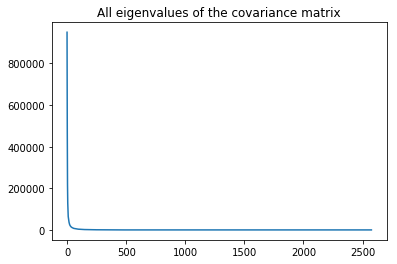

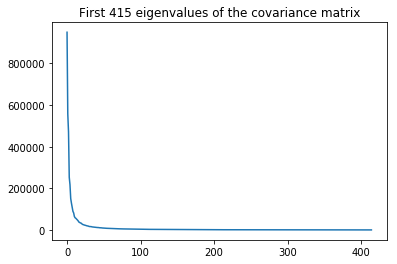

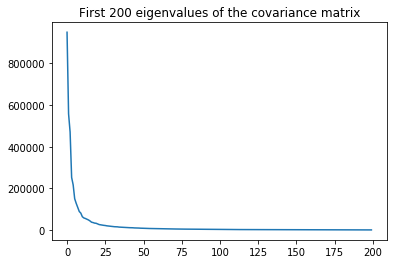

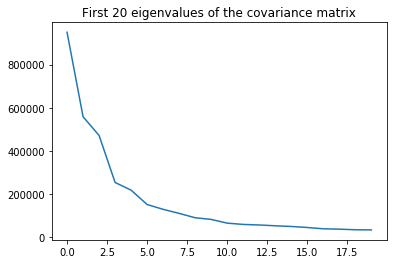

<Figure size 432x288 with 0 Axes>

In [9]:
# Let's visualise the eigenvalues

x = np.arange(0, 2576)

# All of them
plt.plot(x, eigvals) # Clearly out of scale
plt.title('All eigenvalues of the covariance matrix')
plt.figure()

# First 415 of them
plt.plot(x[:415], eigvals[:415]) # Still out of scale
plt.title('First 415 eigenvalues of the covariance matrix')
plt.figure()

# First 200 of them
plt.plot(x[:200], eigvals[:200])
plt.title('First 200 eigenvalues of the covariance matrix')
plt.figure()

# First 20 of them
plt.plot(x[:20], eigvals[:20])
plt.title('First 20 eigenvalues of the covariance matrix')
plt.figure()

plt.show()

In [10]:
# We keep the largest n eigenvalues and their corresponding eigenvectors n<=415, the other eigenvalues are zero

n = 50
eigvecs_best = eigvecs[:, :n]
eigvals_best = eigvals[:n]

# Projecting each training data point to the space spanned by the eigenvectors
proj_pca_train_norm = np.zeros((416, n))
for i in range(416):
    proj_pca_train_norm [i, :] = np.dot(pca_train_norm[i, :], eigvecs_best)
    
print (proj_pca_train_norm, proj_pca_train_norm.shape)

# Now in array proj_pca_train_norm, in each row, we have the projected coordinates for each face image

[[ -575.27013877  -189.51711811   447.80932411 ...    62.4075252
   -192.99384804  -249.60692521]
 [  314.11390912  -633.16342342  -251.77076104 ...   107.41377653
    -54.724141    -110.53174332]
 [ -680.49387894 -1256.54323561   -25.99821496 ...    74.00579455
   -162.85745477    89.49376271]
 ...
 [ 1347.41691416   910.08242648  -117.651151   ...    44.22392155
     -6.15300424   -24.94682837]
 [-1158.34609813  -323.57574212 -1562.47118376 ...    77.84015618
     28.76140567   214.15097667]
 [  725.18357702   599.61286397  1187.73516029 ...   135.45369823
    -27.04996851   -70.0376006 ]] (416, 50)


In [11]:
# Let's try to compute the eigenvalues using the low-dimensional method

# First we need to compute the new covariance matrix (1/N)A^T*A
cov_ld = np.dot(pca_train_norm, pca_train_norm.T)/416
print (cov_ld, cov_ld.shape) # as we can see it is NxN (and not DxD as the covariance matrix we had before)

[[ 8.95093136e+03 -3.33506734e+02  1.64240108e+01 ... -1.04175675e+03
   1.04554848e+03 -9.07851700e+01]
 [-3.33506734e+02  7.12646382e+03  2.96061080e+01 ... -1.03210831e+03
   1.06895174e+03 -2.72670381e+02]
 [ 1.64240108e+01  2.96061080e+01  1.25252893e+04 ... -5.30315593e+03
   9.40904116e+02 -3.92727089e+03]
 ...
 [-1.04175675e+03 -1.03210831e+03 -5.30315593e+03 ...  9.63282677e+03
  -3.27047617e+03  3.13733441e+03]
 [ 1.04554848e+03  1.06895174e+03  9.40904116e+02 ... -3.27047617e+03
   1.87222113e+04 -6.99917285e+03]
 [-9.07851700e+01 -2.72670381e+02 -3.92727089e+03 ...  3.13733441e+03
  -6.99917285e+03  8.02109686e+03]] (416, 416)


In [12]:
# Now we compute the eigenvalues and eigenvectors of the new covariance matrix and measure the elapsed time

start_ld = time.time()
eigvals_ld, eigvecs_ld = np.linalg.eig(cov_ld) # these are not ordered, so we order them and the corresponding eigenvalues
end_ld = time.time()
print (end_ld-start_ld)
print (end-start)

# Taking the real part of the eigenvalues (complex eigenvalues are the result of calculation rounding errors, because the covariance matrix is symmetric)

eigvals_ld = np.real(eigvals_ld)
eigvecs_ld = np.real(eigvecs_ld)

# Order eigenvalues and eigenvectors according to the size of the eigenvalues

index_ld = abs(eigvals_ld).argsort()[::-1] # argsort returns the indices that would sort an array (in this case the vector eigvals)
eigvals_ld = eigvals_ld[index_ld]
eigvecs_ld = eigvecs_ld[:,index_ld]
print (eigvals_ld, eigvals_ld.shape)

0.053465843200683594
6.078167915344238
[9.49883240e+05 5.58084596e+05 4.71115612e+05 2.52967882e+05
 2.17330801e+05 1.50695096e+05 1.28373823e+05 1.09547138e+05
 8.93777970e+04 8.16543848e+04 6.43531883e+04 5.84297920e+04
 5.58034829e+04 5.21603563e+04 4.89267150e+04 4.41669655e+04
 3.81533910e+04 3.64231474e+04 3.37158868e+04 3.29521138e+04
 2.97809950e+04 2.67178512e+04 2.53582101e+04 2.40236468e+04
 2.29969353e+04 2.21514985e+04 2.06869775e+04 1.97979009e+04
 1.89499579e+04 1.83968299e+04 1.66471057e+04 1.64231845e+04
 1.61162237e+04 1.57698651e+04 1.46372388e+04 1.41860199e+04
 1.36782888e+04 1.33257070e+04 1.28420380e+04 1.22982204e+04
 1.20146619e+04 1.17046744e+04 1.16563135e+04 1.13264982e+04
 1.06405575e+04 1.05732746e+04 1.02612121e+04 9.94290857e+03
 9.38010256e+03 9.37396414e+03 8.89481576e+03 8.54520270e+03
 8.40913441e+03 8.15859150e+03 7.85500077e+03 7.77205861e+03
 7.54670997e+03 7.32247059e+03 7.21019334e+03 7.02508112e+03
 6.96043568e+03 6.82611568e+03 6.73149142e+03 

415
0
415
949883.240023101
85.83448543784219
3.0580914029784136e-12


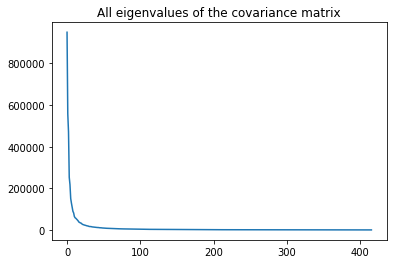

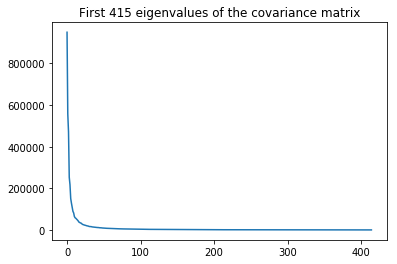

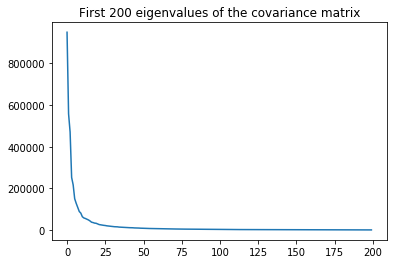

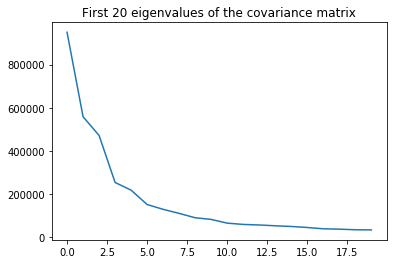

<Figure size 432x288 with 0 Axes>

In [13]:
# How many zero eigenvalues do we have this time?

print (np.linalg.matrix_rank(cov_ld)) # We should have 2576 - 415 = 2161 zero eigenvalues
print ((eigvals_ld == np.zeros(eigvals_ld.shape)).sum()) # The rounding errors will give 0 eigenvalues that are precisely zero
print ((abs(eigvals_ld) >= np.ones(eigvals_ld.shape)/100000).sum()) # However there are 415 eigenvalues that are larger than 1e-05, which can be considered zero eigenvectors.
print (eigvals_ld.max()) # The largest eigenvalue
print (eigvals_ld[414])
print (eigvals_ld[415])

# Let's visualise the eigenvalues

x = np.arange(0, 416)

# All of them
plt.plot(x, eigvals_ld) # Clearly out of scale
plt.title('All eigenvalues of the covariance matrix')
plt.figure()

# First 415 of them
plt.plot(x[:415], eigvals_ld[:415]) # Still out of scale
plt.title('First 415 eigenvalues of the covariance matrix')
plt.figure()

# First 200 of them
plt.plot(x[:200], eigvals_ld[:200])
plt.title('First 200 eigenvalues of the covariance matrix')
plt.figure()

# First 20 of them
plt.plot(x[:20], eigvals_ld[:20])
plt.title('First 20 eigenvalues of the covariance matrix')
plt.figure()

plt.show()

In [14]:
# What is the relationship between the eigenvalues and the eigenvectors resulting from the two methods

print (eigvals[:416]-eigvals_ld, (eigvals[:416]-eigvals_ld).shape)
# The results are zero therefore the eigenvalues are identical

eigvecs_ld_cmp = np.dot(pca_train_norm.T, eigvecs_ld)
eigvecs_ld_cmp = eigvecs_ld_cmp/np.linalg.norm(eigvecs_ld_cmp,axis=0)
print (abs(eigvecs[:, :416])-abs(eigvecs_ld_cmp))
# Note that the values that correspond to the non-zero eigenvalues are zero.
# This means that the direction of the eigenvectors corresponding to the nonzero eigenvalues are the same!

[-4.65661287e-10 -3.49245965e-10  9.89530236e-10 -5.52972779e-10
 -8.73114914e-11 -6.98491931e-10  2.32830644e-10 -4.07453626e-10
 -1.01863407e-10 -1.01863407e-10 -2.32830644e-10  1.38243195e-10
  2.18278728e-11  4.22005542e-10  1.23691279e-10 -2.91038305e-11
  3.20142135e-10  8.73114914e-11 -1.89174898e-10  4.87489160e-10
  1.38243195e-10  1.12777343e-10  1.45519152e-11 -5.45696821e-11
  1.45519152e-11  1.23691279e-10 -1.81898940e-10  5.45696821e-11
 -4.00177669e-11 -2.14640750e-10  9.45874490e-11  0.00000000e+00
 -1.81898940e-11 -9.09494702e-12 -1.07320375e-10  7.45785655e-11
 -2.72848411e-11  2.54658516e-11 -2.36468622e-11 -5.45696821e-12
 -6.54836185e-11  5.27506927e-11  1.09139364e-11 -1.20053301e-10
 -1.27329258e-11 -5.45696821e-12 -5.45696821e-11 -6.18456397e-11
 -4.72937245e-11 -3.09228199e-11  1.81898940e-11 -2.91038305e-11
  4.36557457e-11  6.00266503e-11  3.91082722e-11  1.54614099e-11
 -5.45696821e-11  2.00088834e-11 -2.45563569e-11 -1.63709046e-11
 -2.72848411e-12 -1.09139

In [15]:
# Investigating the memory usage of calculating the eigenvalues and eigenvectors using the different methods

def highdimension():
    eigvals_hd_mem, eigvecs_hd_mem = np.linalg.eig(cov)
    return

def lowdimension():
    eigvals_ld_mem, eigvecs_ld_mem = np.linalg.eig(cov_ld)
    return

mem = max(memory_usage(proc=highdimension))-max(memory_usage(proc=lowdimension))

print("The high dimensional method uses {0} MiB more than the low dimensional method".format(str(mem)))

# Important! This checks how much memory is used by the entire program while the specified processes are running.
# Therefore to get useful information out of the calcaultions, we need to take the difference between the two memory usages calculated!

The high dimensional method uses 202.46484375 MiB more than the low dimensional method


1239.087702684599
528.7633640222958
3.00361782693097e-10


Text(0.5,1,'Reconstruction error vs the number of PCA bases used')

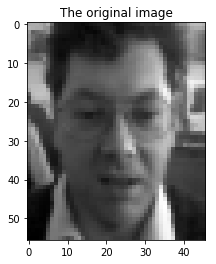

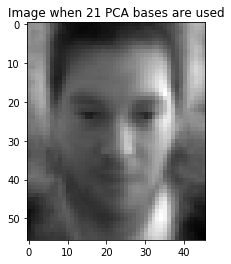

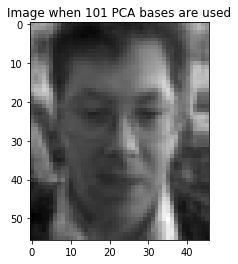

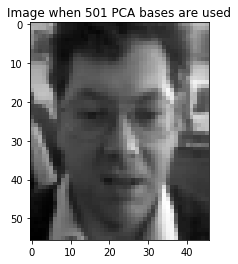

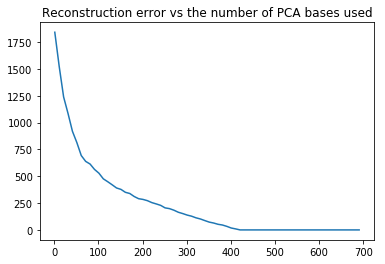

In [16]:
# Let's investigate the reconstruction error of a picture using different number of PCA bases
# The less bases we take, the worse the quality of the reconstructed picture will be, because we lose more and more information

# Print the original image
plt.imshow(np.reshape(pca_train[0, :], (46,56)).T, cmap = 'gist_gray') # Show original face
plt.title('The original image')


reconst_bases = np.arange(1, 700, 10)
reconst_errors = np.zeros(reconst_bases.shape)
k=0
for i in reconst_bases:
    
    # Take the i largest eigenvalues and their corresponding eigenvectors
    eigvecs_rec = eigvecs[:, :i]
    eigvals_rec = eigvals[:i]
    
    # Project the training image to the space spanned by these eigenvectors
    proj_pca_train_norm_rec = np.dot(pca_train_norm[0, :], eigvecs_rec)
    # Now in array proj_pca_train_norm_rec we have the projected coordinates for the face image
    
    # Reconstruct the face using the PCA bases
    face_reconst_rec = avg_face + np.dot(eigvecs_rec, proj_pca_train_norm_rec)
    
    # Calculate the reconstruction error and save it in an array
    reconst_errors[k] = np.linalg.norm(face_reconst_rec-pca_train[0, :])
    k = k+1
    
    if (i==21 or i==101 or i==501):
        print (reconst_errors[k-1])
        plt.figure()
        plt.title('Image when {0} PCA bases are used'.format(str(i)))
        plt.imshow(np.reshape(face_reconst_rec, (46,56)).T, cmap = 'gist_gray') # Show reconstructed faces

plt.figure()
plt.plot(reconst_bases, reconst_errors)
plt.title('Reconstruction error vs the number of PCA bases used')

#plt.savefig('the_best_plot.pdf')

Testing

In [17]:
# Now that we've trained our model, let's test it on our testing data set
# First, let's normalise the testing set (subtract the average face from all face images)

pca_test_norm = pca_test-avg_face # Works because of broadcasting

# Then let's project each testing image to the eigenspace (space spanned by the best n eigenvectors)
proj_pca_test_norm = np.zeros((104, n))
for i in range(104):
    proj_pca_test_norm [i, :] = np.dot(pca_test_norm[i, :], eigvecs_best)

print (proj_pca_test_norm, proj_pca_test_norm.shape)

# Now in array proj_pca_test_norm, in each row, we have the projected coordinates for each face image

[[ 1.54982290e+03  4.65219895e+02 -5.01003088e+02 ...  6.91905231e+01
   7.04236935e+01 -3.97102467e+01]
 [-1.37895553e+02  5.21212906e+02 -8.44192040e+02 ...  1.36602886e+02
  -4.19700771e+01  5.86603588e-01]
 [ 3.72360854e+02  2.54054008e+02  9.95705505e+01 ... -7.38223690e+01
  -9.14467681e+00 -9.62469760e+00]
 ...
 [-5.07371330e+02 -1.05557821e+03  6.46093905e+02 ...  7.48631221e+00
   2.09906216e+01  6.63577280e+01]
 [-9.29805451e+02  2.59649307e+02  1.03466139e+03 ...  1.15870875e+01
   2.04411005e+01 -1.57216361e+01]
 [-2.71439774e+02 -1.94947828e+02 -3.65676396e+02 ... -5.22587131e+01
   2.59218879e+01 -6.91605260e+01]] (104, 50)


1152.1661349708081 57
3
4


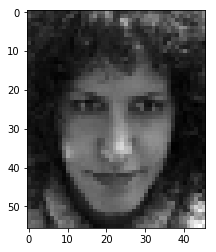

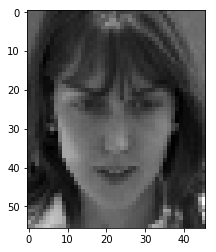

In [18]:
# Let's classify the first image

# Print our actual image
plt.imshow(np.reshape(pca_test[0, :], (46,56)).T, cmap = 'gist_gray')

# How far is the image from each of the testing points?
distance = np.zeros(416)
for i in range(416):
    distance[i] = np.linalg.norm(proj_pca_train_norm[i, :]-proj_pca_test_norm[0, :])
print (distance.min(), distance.argmin())

# Which identity does our picture belong to according to the learning set?
print (training[distance.argmin(), 2576])
# Which identity does it actually belong to?
print (test[0, 2576])

# Print the picture that our picture is the closest to
plt.figure()
plt.imshow(np.reshape(pca_train[distance.argmin(), :], (46,56)).T, cmap = 'gist_gray')

In [19]:
# Now let's do this for all of the testing images

distances = np.zeros((416, 104)) # In each row we store the distances from a particular training smaple (1 column = 1 testing image's distances)

for k in range (104):
    for i in range(416):
        distances[i, k] = np.linalg.norm(proj_pca_train_norm[i, :]-proj_pca_test_norm[k, :])
        
# Now we have in each column the distances of the testing images from each of the training images.

# Next step is to find the minimum of each column, and the corresponding row index (per column)
smallest_distance = distances.min(axis=0) # min per columns
smallest_index = distances.argmin(axis=0) # min is at which index

# Put the actual test labels into a vector
actual_label = test [:, 2576].T
print (actual_label, actual_label.shape)

# Which identity does it belong to according to the learning set?
print (training[smallest_index, 2576], training[smallest_index, 2576].shape)

is_it_same = (training[smallest_index, 2576]==actual_label)
percentage_nn = np.sum(is_it_same)/104
print (percentage_nn)

[ 4 14 38 39 33 14 41  7 18 49 25  8 46  7 42 35 21 31 31 14 16 22  3 52
 51 30 12 26 11 37 34  3 38 29  9 34 37 12  1  9 32  5 16 52 12  9  2 43
  2 14 48  1 46  6  4 23 37 22  8 33  6  5 47 12 48 28 17 38 15  1 10 14
 11 29  6 32 23 25 24 27 40 47 30 44 23 39  8 20  2 33 48 42  1 39  5 15
 49 18 37 22 39 17 35 23] (104,)
[ 3 15 52 39 33 22 41  1 18 49 25  8 46  7 49 35 21 31 28 20 16 24  3 13
 51 30 12 26 48 37 35 16 26 29  9 40 37 12  1  9 32  5 25 29 12  9  5 36
 40 20 36 24 46  6  4 23 37 22  8 47 49  5 47 12 48 28 17 10 15  1 10 15
 12 11 19 34 23 29 24 25 32 47 30 25  3 39  8 20 40  1 48 42  1 37  5 15
 49 14 37 17 39 47 40 23] (104,)
0.5865384615384616


[[ 598288.43518519  -63572.12037037 -271295.81481481 -103620.2037037
  -275583.37037037  115783.07407407]
 [ -63572.12037037  196377.49074074 -189198.7037037    76186.07407407
  -131377.42592593  111584.68518519]
 [-271295.81481481 -189198.7037037   602071.26851852 -117152.28703704
   274547.71296296 -298972.17592593]
 [-103620.2037037    76186.07407407 -117152.28703704  234827.99074074
   -81338.17592593   -8903.39814815]
 [-275583.37037037 -131377.42592593  274547.71296296  -81338.17592593
   441137.32407407 -227386.06481481]
 [ 115783.07407407  111584.68518519 -298972.17592593   -8903.39814815
  -227386.06481481  307893.87962963]] (6, 6)
[[ 1304.59951585 -1341.37294624    62.84031222  -277.69308538
     86.06380747]
 [  498.42333924   768.99011207    19.67180493   176.75791483
    553.95215184]
 [-1683.36799542  -497.02643336   553.39107174   474.5263545
    -15.73493708]
 [  190.69462867   787.04432236   544.5396123   -624.08297039
   -259.1559268 ]
 [-1348.07860775   -36.41954641 

[[1905.64982209 1992.22007457 1949.66009214 ... 2363.44332896
  2247.69915904 2250.00672525]
 [2534.53753032 2225.30137056 2678.50562628 ... 2813.02872284
  2545.18200865 2590.48925409]
 [1305.58428929 1908.77967934 2237.00497883 ... 2905.15621045
  2205.95663609 2541.14915714]
 ...
 [2745.37464714 2791.08439422 2017.14398071 ... 2446.88798795
  2031.20855958 2638.57487643]
 [1969.65283328 2044.53905989 1664.89179658 ... 2488.7738642
  2765.09909254 2180.19437082]
 [2296.67234482 1968.07908373 1780.89050869 ... 2662.49094063
  2383.93482683 2121.99425518]] (52, 104)
[ 3 17 27 39 33 36 41  1 18 49 25 16 46  7  1 35 20 49 36  3 16 43  3 52
 51 30 12 26 49 37 35  3 26 49  9 35 37 12  1  9 16  5 25 49 12  9 41 36
 17 16 36  1 46  6  3 23 37 22  8  1 49  5 47 12 48 36 17 49 15  1 10 11
 11 26 49 35 23 25  3 51 49 47 47  1 23 39  8 20 41  1 48 42  1 37  5 16
 49 16 37 17 39 47 27 23]
[ 4 14 38 39 33 14 41  7 18 49 25  8 46  7 42 35 21 31 31 14 16 22  3 52
 51 30 12 26 11 37 34  3 38 29  9 34

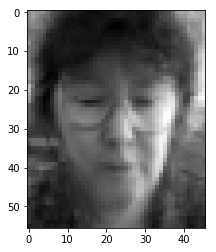

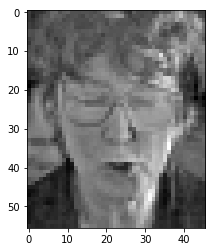

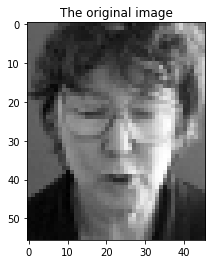

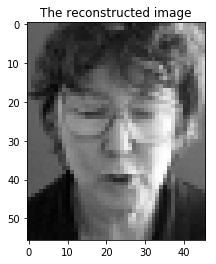

In [20]:
# Alternative method of face recognition: based on reconstruction errors per class

# Create a list of arrays in each array put the training samples depending on their classes
class_sets = []
class_sets_labeled = []
for i in range(52):
    class_sets.append(training[i==(training[:,-1]-1),:2576])
    class_sets_labeled.append(training[i==(training[:,-1]-1),:])
    
# Calculate the mean face of each class
class_means = np.zeros((52,2576))
for i in range(52):
    class_means[i,:] = np.mean(class_sets[i], axis=0)

# Show the mean image of one of the classes
plt.figure()
plt.imshow(np.reshape(class_means[0, :], (46,56)).T, cmap = 'gist_gray')

# Now let's subtract the mean image per class from the training face images per class
class_pca_train_norm = []
for i in range(52):
    class_pca_train_norm.append(class_sets[i]-class_means[i, :])

plt.figure()
plt.imshow(np.reshape(class_pca_train_norm[0][0, :], (46,56)).T, cmap = 'gist_gray') 
# Show the first normalised face image of the first class and notice that it is distorted

# Computing the covariance matrix for each class, using the low dimensional method
class_cov = []
for i in range(52):
    class_cov.append(np.dot(class_pca_train_norm[i], class_pca_train_norm[i].T)/(class_sets[i].shape[0]))
print (class_cov[0], class_cov[0].shape)

# Computing the eigenvalues and eigenvectors of the covariance matrices per class and measuring how long it takes, using the low dimensional method

# measure how long it takes!!!

n = 5 # Needs to be less or equal to the sample size of the smallest class

class_projected = []
class_eigvecs = []
for i in range(52):
    number_of_samples = class_sets[i].shape[0]
    eigvals_tmp, eigvecs_tmp = np.linalg.eig(class_cov[i]) # these are not ordered, so we need to order them according to the eigenvalues
    # Taking the real part of the eigenvalues (complex eigenvalues are the result of calculation rounding errors, because the covariance matrix is symmetric)
    eigvals_tmp = np.real(eigvals_tmp)
    eigvecs_tmp = np.real(eigvecs_tmp)
    
    # Order eigenvalues and eigenvectors according to the size of the eigenvalues
    index_tmp = (abs(eigvals_tmp)).argsort()[::-1] # argsort returns the indices that would sort an array (in this case the vector eigvals)
    eigvals_tmp = eigvals_tmp[index_tmp]
    eigvecs_tmp = eigvecs_tmp[:,index_tmp]

    eigvecs_best_tmp_tmp = np.dot(class_pca_train_norm[i].T, eigvecs_tmp)
    eigvecs_best_tmp_tmp = eigvecs_best_tmp_tmp/np.linalg.norm(eigvecs_best_tmp_tmp, axis=0)

    # We keep the largest n eigenvalues for each class and their corresponding eigenvectors
    eigvecs_best_tmp = eigvecs_best_tmp_tmp[:, :n]
    eigvals_best_tmp = eigvals_tmp[:n]
    
    # Projecting each training data point per class to the space spanned by the eigenvectors per class
    class_proj_pca_train_norm = np.zeros((number_of_samples, n))
    for j in range(number_of_samples):
        class_proj_pca_train_norm [j, :] = np.dot(class_pca_train_norm[i][j, :], eigvecs_best_tmp)
    class_projected.append(class_proj_pca_train_norm)
    class_eigvecs.append(eigvecs_best_tmp)
    
print (class_projected[0], class_projected[0].shape)
print (class_eigvecs[0], class_eigvecs[0].shape)

# Now in array class_proj_pca_train_norm, in each row of each array in the list, we have the projected coordinates for each face image per class

# Let's reconstruct one picture to check if we've still done everything correctly.
# Print the original image
plt.figure()
plt.imshow(np.reshape(class_sets[0][0, :], (46,56)).T, cmap = 'gist_gray') # Show original face
plt.title('The original image')

face_rec_alt = class_means[0, :] + np.dot(class_eigvecs[0], class_projected[0][0, :])
rec_err_alt = np.linalg.norm(class_sets[0][0,:]-face_rec_alt)

plt.figure()
plt.imshow(np.reshape(face_rec_alt, (46,56)).T, cmap = 'gist_gray')
plt.title('The reconstructed image')
print (rec_err_alt)

# Now normalise the testing pictures and project the them to all all of the class eigenvectors

class_pca_test_norm = []
for i in range(52):
    class_pca_test_norm.append(pca_test-class_means[0, :]) # Works because of broadcasting

print (class_pca_test_norm[0], class_pca_test_norm[0].shape)

class_proj_test = []
for i in range(52):
    # Now let's project each testing image to the eigenspaces (space spanned by the best n eigenvectors) per class
    proj_pca_test_norm_alt = np.zeros((104, n))
    for l in range (104):
        proj_pca_test_norm_alt[l, :] = np.dot(class_pca_test_norm[i][l, :], class_eigvecs[i])
    class_proj_test.append(proj_pca_test_norm_alt)
        
print (class_proj_test[7], class_proj_test[7].shape)


reconstruction_errors = np.zeros((52, 104)) # 1 column = 1 testing image
for z in range(104):
    for i in range(52):
        face_reconstructed = class_means[i, :] + np.dot(class_eigvecs[i], class_proj_test[i][z, :])
        reconstruction_errors[i, z] = np.linalg.norm (pca_test[z, :]-face_reconstructed)
    # Reconstruct each in each of the classes

print (reconstruction_errors, reconstruction_errors.shape)
# Now in array proj_pca_test_norm, in each row, we have the projected coordinates for each face image
#plt.savefig('the_best_plot.pdf')

print (np.argmin(reconstruction_errors, axis = 0)+1)
print (actual_label)

is_it_same_alt = (np.argmin(reconstruction_errors, axis = 0)+1==actual_label)
percentage_alt = np.sum(is_it_same_alt)/104
print (percentage_alt)
#reconst_bases = np.arange(1, 700, 10)
#reconst_errors = np.zeros(reconst_bases.shape)
#k=0
#for i in reconst_bases:
    
    # Take the i largest eigenvalues and their corresponding eigenvectors
  #  eigvecs_rec = eigvecs[:, :i]
   # eigvals_rec = eigvals[:i]
    
    # Project the training image to the space spanned by these eigenvectors
  #  proj_pca_train_norm_rec = np.dot(pca_train_norm[0, :], eigvecs_rec)
    # Now in array proj_pca_train_norm_rec we have the projected coordinates for the face image
    
    # Reconstruct the face using the PCA bases
   # face_reconst_rec = avg_face + np.dot(eigvecs_rec, proj_pca_train_norm_rec)
    
    # Calculate the reconstruction error and save it in an array
  #  reconst_errors[k] = np.linalg.norm(face_reconst_rec-pca_train[0, :])
  #  k = k+1
    
   # if (i==21 or i==101 or i==501):
    #    print (reconst_errors[k-1])
   #     plt.figure()
     #   plt.title('Image when {0} PCA bases are used'.format(str(i)))
      #  plt.imshow(np.reshape(face_reconst_rec, (46,56)).T, cmap = 'gist_gray') # Show reconstructed faces

#plt.figure()
#plt.plot(reconst_bases, reconst_errors)
#plt.title('Reconstruction error vs the number of PCA bases used')

#plt.savefig('the_best_plot.pdf')

In [21]:
# Now let's vary the number of PCA bases
print ('5')


5
